In [49]:
import os,glob
import re

--------------------------------

In [19]:
import glob
import pandas as pd
import re
from bs4 import BeautifulSoup

# Funktion zum Extrahieren von Artikeln + Topics + Train/Test-Split
def extract_articles_with_topics_and_split(file_path):
    with open(file_path, "r", encoding="ISO-8859-1") as file:
        soup = BeautifulSoup(file.read(), "html.parser")

        articles_data = []
        
        for reuters in soup.find_all("reuters"):
            # Body-Text extrahieren
            body = reuters.body.get_text(strip=True) if reuters.body else ""
            text = body.strip()

            # Nur Topics aus <TOPICS><D>...</D></TOPICS> extrahieren
            topics_tag = reuters.find("topics")
            topics = [topic.get_text(strip=True) for topic in topics_tag.find_all("d")] if topics_tag else []
            topics = ",".join(topics)  # Liste zu String machen

            # Train/Test-Split aus Attribut `LEWISSPLIT`
            split = reuters.get("lewissplit", "").upper()  # Falls Attribut fehlt, leere Zeichenkette zurückgeben

            # HTML-Entities entfernen
            text = re.sub(r'&#\d+;', '', text)

            if text:  # Nur hinzufügen, wenn Text existiert
                articles_data.append({"topics": topics, "text": text, "split": split})

        return articles_data

# Alle SGM-Dateien finden
sgm_files = glob.glob("reuters21578/*.sgm")

# Daten aus allen Dateien extrahieren
all_articles = []

for file_path in sgm_files:
    articles = extract_articles_with_topics_and_split(file_path)
    all_articles.extend(articles)

# DataFrame erstellen
df = pd.DataFrame(all_articles)

# Ergebnis anzeigen

# DataFrame als CSV speichern
df.to_csv("reuters_articles_with_split.csv", index=False)
df.tail(20)


,topics,text,split
19023,rubber,International Rubber Organisation\n(INRO) buff...,TEST
19024,,Continental Airlines Inc said\nFrontier Airlin...,TEST
19025,,Nippon Shinpan Co Ltd <NSHT.T> has agreed\nwit...,TEST
19026,"money-fx,nzdlr",An income tax surcharge and capital\ngains tax...,TEST
19027,trade,The Philippines' trade deficit widened to\n542...,TEST
19028,,Iranian President Ali Khamenei said he\ndoubte...,TEST
19029,sugar,New Zealand has imposed sanctions\nagainst Fij...,TEST
19030,,The Ministry of Finance has started to\nconsid...,TEST
19031,coffee,Uganda plans to export roasted coffee to\nEuro...,TEST
19032,crude,The Soviet Union has agreed to supply\nIran wi...,TEST


In [4]:
import glob,re,os
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
#falsch
def extract_articles_with_topics_and_split(file_path, tag = [list]):
    with open(file_path, "r", encoding="ISO-8859-1") as file:
        soup = BeautifulSoup(file.read(), "html.parser")

        articles_data = []
        
        for reuters in soup.find_all("reuters"):
            # Body-Text extrahieren
            body = reuters.tag.get_text(strip=True) if reuters.tag else ""
            text = body.strip()
            print(text)
            # # Nur Topics aus <TOPICS><D>...</D></TOPICS> extrahieren
            # topics_tag = reuters.find("topics")
            # topics = [topic.get_text(strip=True) for topic in topics_tag.find_all("d")] if topics_tag else []
            # topics = ",".join(topics)  # Liste zu String machen

            # # Train/Test-Split aus Attribut `LEWISSPLIT`
            # split = reuters.get("lewissplit", "").upper()  # Falls Attribut fehlt, leere Zeichenkette zurückgeben

            # HTML-Entities entfernen
            text = re.sub(r'&#\d+;', '', text)

            if text:  # Nur hinzufügen, wenn Text existiert
                articles_data.append({"text": text})

        return articles_data
    

# Alle SGM-Dateien finden
sgm_files = glob.glob("reuters21578/*.sgm")

# Daten aus allen Dateien extrahieren
all_articles = []
tag = ['body']
for file_path in sgm_files:
    
    articles = extract_articles_with_topics_and_split(file_path, tag=tag)
    all_articles.extend(articles)

# DataFrame erstellen
df = pd.DataFrame(all_articles)

# Ergebnis anzeigen

# DataFrame als CSV speichern
df.to_csv("reuters_text.csv", index=False)
df.tail(20)

""


In [12]:
#richtig
import glob
import pandas as pd
import re
from bs4 import BeautifulSoup

# Funktion zum Extrahieren von Text aus einem bestimmten HTML-Tag (z. B. <BODY>)
def extract_articles_with_tag(file_path, tag_name="body"):
    with open(file_path, "r", encoding="ISO-8859-1") as file:
        soup = BeautifulSoup(file.read(), "html.parser")

        articles_data = []
        
        for reuters in soup.find_all("reuters"):
            # Text aus dem gewünschten Tag extrahieren
            tag_content = reuters.find(tag_name)
            text = tag_content.get_text(strip=True) if tag_content else ""

            # HTML-Entities entfernen
            text = re.sub(r'&#\d+;', '', text)

            if text:  # Nur hinzufügen, wenn Text existiert
                articles_data.append({"text": text})

        return articles_data

# Alle SGM-Dateien finden
sgm_files = glob.glob("reuters21578/*.sgm")

# Daten aus allen Dateien extrahieren
all_articles = []
tag_name = "body"  # Den gewünschten Tag hier angeben

for file_path in sgm_files:
    articles = extract_articles_with_tag(file_path, tag_name)
    all_articles.extend(articles)

# DataFrame erstellen
df = pd.DataFrame(all_articles)

# Ergebnis anzeigen
print(df.head())

# DataFrame als CSV speichern
df.to_csv("reuters_text.csv", index=False)
df.tail(20)


                                                text
0  Showers continued throughout the week in\nthe ...
1  Standard Oil Co and BP North America\nInc said...
2  Texas Commerce Bancshares Inc's Texas\nCommerc...
3  BankAmerica Corp is not under\npressure to act...
4  The U.S. Agriculture Department\nreported the ...


,text
19023,International Rubber Organisation\n(INRO) buff...
19024,Continental Airlines Inc said\nFrontier Airlin...
19025,Nippon Shinpan Co Ltd <NSHT.T> has agreed\nwit...
19026,An income tax surcharge and capital\ngains tax...
19027,The Philippines' trade deficit widened to\n542...
19028,Iranian President Ali Khamenei said he\ndoubte...
19029,New Zealand has imposed sanctions\nagainst Fij...
19030,The Ministry of Finance has started to\nconsid...
19031,Uganda plans to export roasted coffee to\nEuro...
19032,The Soviet Union has agreed to supply\nIran wi...


In [15]:
import glob
import pandas as pd
import re
from bs4 import BeautifulSoup

# Funktion zum Extrahieren von Artikeln + Topics + Train/Test-Split
def extract_articles_with_topics_and_split(file_path, tags = [list]):
    with open(file_path, "r", encoding="ISO-8859-1") as file:
        soup = BeautifulSoup(file.read(), "html.parser")

        articles_data = []
        
        for reuters in soup.find_all("reuters"):
            # Body-Text extrahieren
            body = reuters.body.get_text(strip=True) if reuters.body else ""
            text = body.strip()

            # Nur Topics aus <TOPICS><D>...</D></TOPICS> extrahieren
            topics_tag = reuters.find("topics")
            topics = [topic.get_text(strip=True) for topic in topics_tag.find_all("d")] if topics_tag else []
            topics = ",".join(topics)  # Liste zu String machen

            # Train/Test-Split aus Attribut `LEWISSPLIT`
            split = reuters.get("lewissplit", "").upper()  # Falls Attribut fehlt, leere Zeichenkette zurückgeben

            # HTML-Entities entfernen
            text = re.sub(r'&#\d+;', '', text)

            if text:  # Nur hinzufügen, wenn Text existiert
                articles_data.append({"topics": topics, "text": text, "split": split})

        return articles_data

# Alle SGM-Dateien finden
sgm_files = glob.glob("reuters21578/*.sgm")

# Daten aus allen Dateien extrahieren
all_articles = []

for file_path in sgm_files:
    articles = extract_articles_with_topics_and_split(file_path)
    all_articles.extend(articles)

# DataFrame erstellen
df = pd.DataFrame(all_articles)

# Ergebnis anzeigen

# DataFrame als CSV speichern
df.to_csv("reuters_articles_with_split.csv", index=False)
df.tail(20)


                                                body  \
0  Showers continued throughout the week in\nthe ...   
1  Standard Oil Co and BP North America\nInc said...   
2  Texas Commerce Bancshares Inc's Texas\nCommerc...   
3  BankAmerica Corp is not under\npressure to act...   
4  The U.S. Agriculture Department\nreported the ...   

                           topics  
0                           cocoa  
1                             NaN  
2                             NaN  
3                             NaN  
4  grainwheatcornbarleyoatsorghum  


,body,topics
20013,International Rubber Organisation\n(INRO) buff...,rubber
20014,Continental Airlines Inc said\nFrontier Airlin...,NaN
20015,Nippon Shinpan Co Ltd <NSHT.T> has agreed\nwit...,NaN
20016,An income tax surcharge and capital\ngains tax...,money-fxnzdlr
20017,The Philippines' trade deficit widened to\n542...,trade
20018,Iranian President Ali Khamenei said he\ndoubte...,NaN
20019,New Zealand has imposed sanctions\nagainst Fij...,sugar
20020,The Ministry of Finance has started to\nconsid...,NaN
20021,Uganda plans to export roasted coffee to\nEuro...,coffee
20022,The Soviet Union has agreed to supply\nIran wi...,crude


In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import pandas as pd
from germansentiment import SentimentModel
import matplotlib.pyplot as plt


In [10]:
import pandas as pd
import os
os.chdir("/home/riccardodandrea/Schreibtisch/Github/ReutersNOZ")
df = pd.read_csv("reuters_articles_with_split.csv")
topics = str(df["topics"])
topics

'0                                      cocoa\n1                                        NaN\n2                                        NaN\n3                                        NaN\n4        grain,wheat,corn,barley,oat,sorghum\n                        ...                 \n19038                                   ship\n19039                                    ipi\n19040                                   gold\n19041                                    NaN\n19042                                    NaN\nName: topics, Length: 19043, dtype: object'

In [11]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
#Settings
language="english"
sample_text=topics
stop_words=set(stopwords.words(language))

In [13]:
print("")
tokenized_sent=sent_tokenize(sample_text)
print("Sentences", tokenized_sent)
print("Number of Sentences:",len(tokenized_sent))
print("")


Sentences ['0                                      cocoa\n1                                        NaN\n2                                        NaN\n3                                        NaN\n4        grain,wheat,corn,barley,oat,sorghum\n                        ...                 \n19038                                   ship\n19039                                    ipi\n19040                                   gold\n19041                                    NaN\n19042                                    NaN\nName: topics, Length: 19043, dtype: object']
Number of Sentences: 1



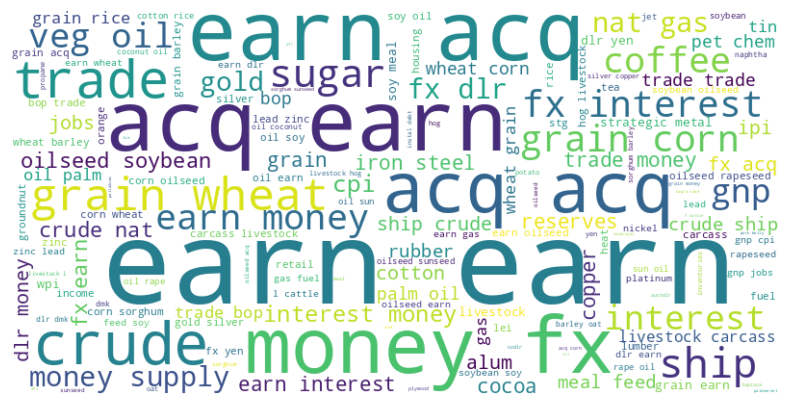

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Alle Topics aus dem DataFrame als String zusammenfügen
all_topics = ' '.join(df["topics"].dropna())  # NaN-Werte vermeiden

# Erstellen der WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_topics)

# Plotten der WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Keine Achsen anzeigen
plt.savefig("words", dpi=300)


In [18]:
from collections import Counter

# Alle Topics in einer Liste speichern
topic_list = ' '.join(df["topics"].dropna()).split()  # Entfernt NaN und splittet Wörter

# Wortfrequenz zählen
word_counts = Counter(topic_list)

# Die 10 häufigsten Wörter ausgeben
print(word_counts.most_common())


[('earn', 3735), ('acq', 2125), ('crude', 355), ('trade', 333), ('money-fx', 259), ('interest', 211), ('ship', 156), ('grain,wheat', 139), ('sugar', 135), ('money-fx,interest', 130), ('coffee', 114), ('gold', 99), ('money-supply', 97), ('grain,corn', 78), ('gnp', 73), ('cpi', 68), ('money-fx,dlr', 61), ('cocoa', 55), ('copper', 54), ('crude,nat-gas', 52), ('jobs', 48), ('iron-steel', 46), ('grain', 45), ('alum', 45), ('crude,ship', 45), ('reserves', 42), ('nat-gas', 42), ('ipi', 41), ('rubber', 39), ('veg-oil', 37), ('tin', 30), ('dlr,money-fx', 28), ('interest,money-fx', 27), ('ship,crude', 27), ('cotton', 26), ('trade,bop', 26), ('money-fx,dlr,yen', 26), ('grain,rice', 25), ('oilseed,soybean', 24), ('bop', 24), ('wpi', 23), ('veg-oil,palm-oil', 22), ('gas', 22), ('livestock,carcass', 21), ('pet-chem', 21), ('livestock', 20), ('strategic-metal', 19), ('retail', 18), ('orange', 18), ('bop,trade', 18), ('grain,wheat,corn', 18), ('oilseed,rapeseed', 17), ('wheat,grain', 15), ('housing', 